Analyze the effect of high dose naspm on spontaneous synaptic transmission

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip, spon_ana
import seaborn as sns
import pickle
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
# % matplotlib notebook

%load_ext autoreload
% autoreload 2

In [2]:
target = 151
psc_naspm_bef = pd.read_pickle('/data/psc_non_asso_am_2Hz_slope4_thres2.5_before_'+str(target))
psc_naspm_aft = pd.read_pickle('/data/psc_non_asso_am_2Hz_slope4_thres2.5_after_'+str(target))

In [3]:
psc_naspm_stim = pd.read_pickle('/data/ana_am_nonasso')

In [4]:
psc_naspm_stim

,Before,After,File name,elimi,spon_elimi_bef,spon_elimi_aft
147,"{'decay_tau': [nan, 0.00265402419135, 0.002532...","{'decay_tau': [0.00104551311642, 0.00111395643...",2017112801,20,"[1, 36]",[]
148,"{'decay_tau': [0.00125368489388, 0.00118982163...","{'decay_tau': [0.00128502442827, 0.00162157524...",2017112901,25,"[30, 31, 32, 33]","[30, 31, 34, 37, 39, 42, 44, 46, 51]"
150,"{'decay_tau': [0.00410887991805, nan, 0.003289...","{'decay_tau': [0.00281358178434, 0.00307859397...",2017120701,15,[2],[]
151,"{'decay_tau': [nan, nan, nan, 0.00203782322458...","{'decay_tau': [nan, nan, nan, nan, nan, nan, n...",2017120702,30,"[12, 25]","[49, 51]"
152,"{'decay_tau': [0.00108855106994, 0.00115818597...","{'decay_tau': [0.00101834192861, 0.00101862941...",2017121101,33,"[1, 3, 4, 5, 9, 10, 11, 30, 33, 36, 37]","[63, 65]"
153,"{'decay_tau': [0.00159962645463, 0.00187714486...","{'decay_tau': [0.00193493424025, 0.00183582629...",2017121102,15,"[1, 17, 18, 29, 32]",[]


In [5]:
psc_naspm_stim.loc[target].Before.keys()

dict_keys(['decay_tau', 'raw_amp1', 'ave_amp2', 'resp2_region', 'ave_amp1', 'raw_amp2', 'trace_y2', 'spon_trace', 'onset_tau', 'ir', 'rs', 'resp1_region', 'x', 'failure', 'PPR', 'ave_all', 'trace_y1'])

In [6]:
decay_tau_stim_bef = np.array(psc_naspm_stim.loc[target].Before['decay_tau'])
decay_tau_stim_aft = np.array(psc_naspm_stim.loc[target].After['decay_tau'])

decay_tau_stim_bef = decay_tau_stim_bef[~np.isnan(decay_tau_stim_bef)]
decay_tau_stim_aft = decay_tau_stim_aft[~np.isnan(decay_tau_stim_aft)]

In [7]:
amp_stim_bef = np.array(psc_naspm_stim.loc[target].Before['raw_amp1'])
amp_stim_aft = np.array(psc_naspm_stim.loc[target].After['raw_amp1'])

amp_stim_bef = amp_stim_bef[~np.isnan(amp_stim_bef)]
amp_stim_aft = amp_stim_aft[~np.isnan(amp_stim_aft)]

In [8]:
np.log(np.min(decay_tau_stim_bef))

-6.1958730876017087

In [9]:
para_bef, para_aft = spon_ana.pair_amp_tau(psc_naspm_bef, psc_naspm_aft)

In [10]:
log_amp_bef = np.log(para_bef['amp'])
log_amp_aft = np.log(para_aft['amp'])
log_decay_bef = np.log(para_bef['decay_tau'])
log_decay_aft = np.log(para_aft['decay_tau'])

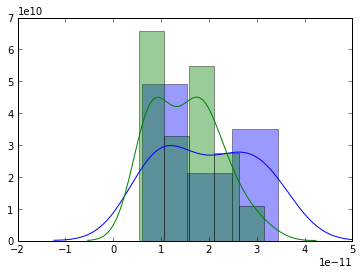

In [11]:
sns.distplot(amp_stim_bef)
sns.distplot(amp_stim_aft)
# plt.xlim([0, 1.4e-10])

(0, 1.4e-10)

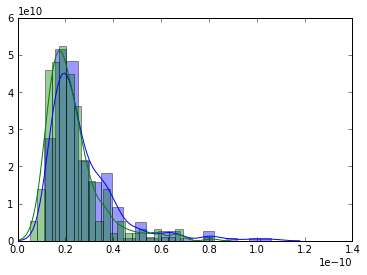

In [12]:
sns.distplot(para_bef['amp'])
sns.distplot(para_aft['amp'])
plt.xlim([0, 1.4e-10])

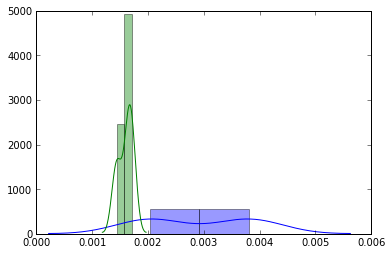

In [13]:
sns.distplot(decay_tau_stim_bef)
sns.distplot(decay_tau_stim_aft)

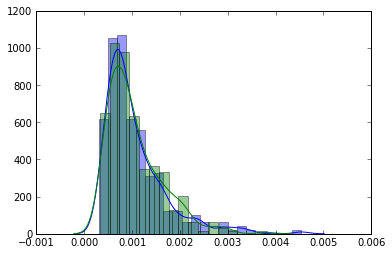

In [14]:
sns.distplot(para_bef['decay_tau'])
sns.distplot(para_aft['decay_tau'])

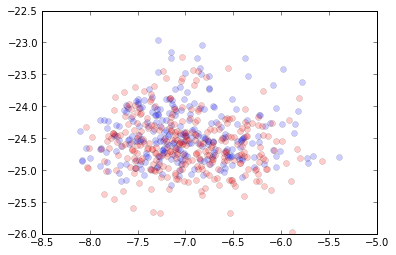

In [15]:
plt.plot(log_decay_bef,log_amp_bef, 'o', alpha=0.2)
plt.plot(log_decay_aft,log_amp_aft, 'ro', alpha=0.2)

# with PdfPages('/data/Figure3_10.pdf') as pdf:
#     pdf.savefig()

In [16]:
len(np.where(log_decay_bef<-7.5)[0])

42

In [17]:
len(np.where(log_decay_aft<-7.5)[0])

55

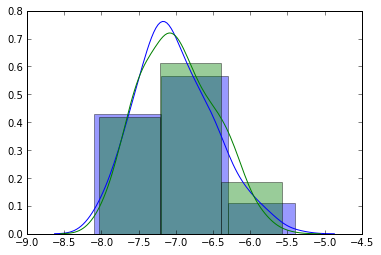

In [18]:
sns.distplot(log_decay_bef, bins=3)
sns.distplot(log_decay_aft, bins=3)

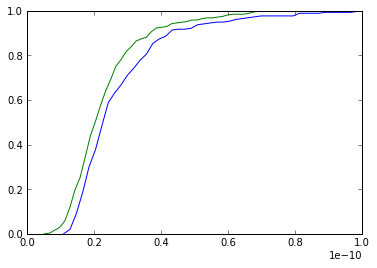

In [19]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(para_bef['amp'])
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(para_aft['amp'])
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)

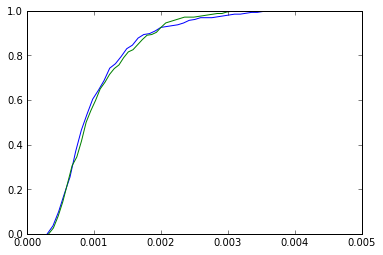

In [20]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(para_bef['decay_tau'])
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(para_aft['decay_tau'])
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)

In [21]:
import scipy
scipy.stats.ranksums(para_bef['decay_tau'], para_aft['decay_tau'])

RanksumsResult(statistic=-0.62891272466131365, pvalue=0.52940619502092168)